<a href="https://colab.research.google.com/github/Gio-Benitez/MLHomeworksColab/blob/main/CIIC_5150_Machine_Learning_Algorithms_Homework_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CIIC 5150 Machine Learning Algorithms Homework #2
Giovanni I Benitez Rivera

1. Create and use a function

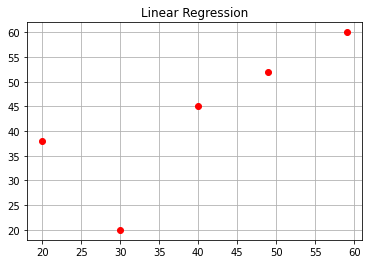

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pdb

data = {'x':[59,49,40,30,20],
        'y':[60,52,45,20,38]}
data_frame = pd.DataFrame(data)
data_frame.head(2)
x_val = data_frame.loc[:, ['x']]
y_val = data_frame.loc[:, ['y']]
x_values = x_val.to_numpy()
y_values = y_val.to_numpy()
plt.plot(x_values, y_values, 'ro')
plt.title("Linear Regression")
plt.grid(True)
#Create a function for (xi-\bar{x})^2
def deviation_score(values):
        x_bar = values.mean()
        square_deviation = []
        deviation = []
        #cross_deviation = []
        for index in range(len(values)):
                square_deviation.append((values[index]-x_bar)**2)
                deviation.append((values[index]-x_bar))
                #cross_deviation.append(np.cross(values[index]-x_bar,values[index]-x_bar))
        return square_deviation, deviation
deviation_x_square, deviation_x = deviation_score(values=x_values)
deviation_y_square, deviation_y = deviation_score(values=y_values)
#Create a function to find the product scores
def deviation_product(xdev, ydev):
        result = []
        for i in range(0, len(xdev) - 1):
                result.append(xdev[i] * ydev[i])
        return result
deviation_products = deviation_product(deviation_x, deviation_y)

2. Create a slope and intercept function for a linear model.

In [2]:
#Show the results as a pandas dataframe
import pandas as pd
import pdb

#Product Scores

#Find the slope (represented by a) in y = ax + b
def slope_value(product_scores, deviation_x_square):
        slope = (sum(product_scores))/sum(deviation_x_square) #Slope equation
        return slope
slope_val = slope_value(deviation_products, deviation_x_square)
#Find the slope value for the regression
def intercept_value(x_values, y_values, slope_val):
        intercept = y_values.mean() - slope_val * x_values.mean()
        return intercept
intercept_val = intercept_value(x_values, y_values, slope_val)
print("Intercept value:{}\n".format(intercept_val))
print("Slope value:{}\n".format(slope_val))

Intercept value:[16.24096898]

Slope value:[0.67573311]



3. Linear regression model.

In [3]:
#Use the regression
def regression_value(new_value, intercept_value, slope_value):
        y_estimator = slope_value * new_value + intercept_value
        return y_estimator
y_estimator = regression_value(80, intercept_val, slope_val)

print("The new estimator:{}\n".format(y_estimator))

The new estimator:[70.29961751]



4. JSON file for red blood cells.

,Age,Red_blood_cells
0,43,99
1,21,70
2,25,79
3,42,75
4,57,90


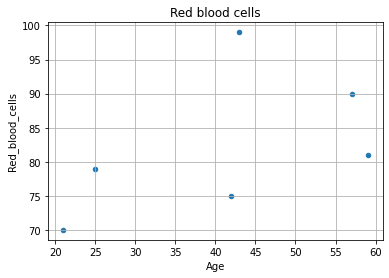

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Create JSON file
data = {'Age':[43,21,25,42,57,59], 'Red_blood_cells':[99,70,79,75,90,81]}
data_frame = pd.DataFrame(data)
data_frame.plot(kind='scatter', x='Age', y='Red_blood_cells', grid=True, title='Red blood cells')
data_frame.head(5)

5. Function two to obtain the linear regression parameters.

In [5]:
import numpy as np
import pdb
import matplotlib.pyplot as plt

#Create a function
def coefficients_linear_regression(x_data, y_data):
        n_size = len(x_data)
        sum_y = sum(y_data)
        sum_x = sum(x_data)
        sum_xy = sum(x_data * y_data)
        sum_square_x = sum(x_data**2)
        sum_square_y = sum(y_data**2)
        b = ((sum_y * sum_square_x) - (sum_x * sum_xy)) / ((n_size * sum_square_x) - sum_x ** 2) #Y = aX + b
        a = ((n_size * sum_xy) - (sum_x * sum_y)) / ((n_size * sum_square_x) - sum_x ** 2)
        return a, b #Return data

7. Test the linear regression implemented by sklearn.

Score:0.616825366003781

Intercept:[12.11772206]

Coefficient:[[0.7798555]]

Prediction for new data:[[43.3119422 ]
 [56.56948576]]



/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


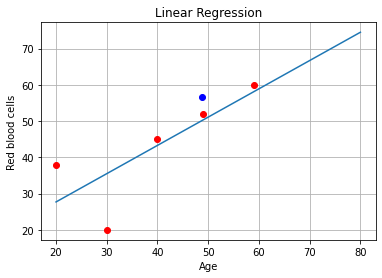

In [6]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

plt.plot(x_val, y_val, 'ro')
plt.title("Linear Regression")
plt.xlabel("Age")
plt.ylabel("Red blood cells")
#Linear Regression
regression = LinearRegression().fit(x_val, y_val)
print("Score:{}\n".format(regression.score(x_val, y_val)))
regression.score
regression.intercept_
regression.coef_
data_prediction = regression.predict(np.array([[47],[57]]))
print("Intercept:{}\n".format(regression.intercept_))
print("Coefficient:{}\n".format(regression.coef_))
print("Prediction for new data:{}\n".format(regression.predict(np.array([[40],[57]]))))
x_data = np.linspace(x_val.min(), 80, 30)
y_regression = regression.coef_ * x_data + regression.intercept_
plt.plot(data_prediction[0], data_prediction[1], 'bo')
plt.plot(x_data, y_regression)
plt.grid(True)

9. Load Boston Dataset.

Target:[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 29.9 37.2 39.8 36.2
 37.9 32.5 26.4 29.6 50.  32.  29.8 34.9 37.  30.5 36.4 31.1 29.1 50.


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10


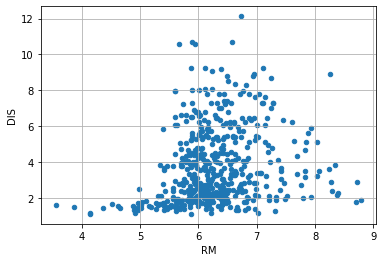

In [7]:
#Load the dataset
from sklearn.datasets import load_wine, load_boston
import pandas as pd
import matplotlib.pyplot as plt

data_boston = load_boston()
#Print the information in target, class and data
print("Target:{}\n".format(data_boston.target))
print("Values:{}\n".format(data_boston.data))
#Manipulate the data using pandas
data_frame_features = pd.DataFrame(data = data_boston.data, columns= data_boston.feature_names)
data_frame_targets = pd.DataFrame(data = data_boston.target, columns= ['class'])
#Plot data
data_frame_features.plot(kind= 'scatter', x='RM', y='DIS', grid=True)
#Preview of 10 data
data_frame_features.head(10)

12. Linear Regression using Boston Datasets.

Coefficient:[-0.60538999]

MSE:19.11842091105384

Rˆ2:0.18227805223015148



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

Text(0.5, 1.0, 'Linear Regression')

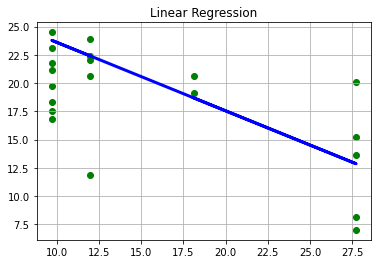

In [8]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import pdb

#Load dataset
x_data, y_data = datasets.load_boston(return_X_y=True)
#Train data
x_data = x_data[:, np.newaxis, 2]
x_train_data = x_data[:-80]
y_train_data = y_data[:-80]
#Test data
x_test_data = x_data[-20:]
y_test_data = y_data[-20:]
#Create the linear regression
regression_model = linear_model.LinearRegression()
#Train the model
regression_model.fit(x_train_data, y_train_data)
#Prediction
predict_data = regression_model.predict(x_test_data)

#Metrics for the prediction
print("Coefficient:{}\n".format(regression_model.coef_))
print("MSE:{}\n".format(mean_squared_error(y_test_data, predict_data)))
print("Rˆ2:{}\n".format(r2_score(y_test_data, predict_data)))

#Plot data
plt.scatter(x_test_data, y_test_data, color='green')
plt.plot(x_test_data, predict_data, color='blue', linewidth=3)
plt.grid(True)
plt.title("Linear Regression")

Function for computing the determination coefficient R^2.

In [9]:
def r2_coef(y_sample, y_predict):
    y_mean = y_sample.mean()
    num = 0
    den = 0
    count = 0
    for s in y_sample:
        num += (s - y_predict[count])**2
        den += (s - y_mean)**2
        count += 1
    r2 = 1 - num/den
    return r2
print(r2_coef(y_test_data, predict_data))

0.1822780522301516
